# **TellCo Customer Analysis**
**by Fumbani Banda**

**Dataset Overview**

[A link to Dataset](https://raw.githubusercontent.com/deadex-ng/UserAnalyticsTelecom/main/data/Week1_data.csv)

**Research Questions**
1. Identifying the top 10 handsets used by the customers.
2. Identify the top 3 handset manufacturers
3. Identify the top 5 handsets per top 3 handset manufacturer
4. Make a short interpretation and recommendation to marketing teams




#**TASK1**

**Libraries**

In [252]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

**Gather**

In [253]:
data_url = 'https://raw.githubusercontent.com/deadex-ng/UserAnalyticsTelecom/main/data/Week1_data.csv'
df = pd.read_csv(data_url)
df.head(5)

Bearer Id            Start  ...  Total UL (Bytes) Total DL (Bytes)
0  1.311448e+19   4/4/2019 12:01  ...        36749741.0      308879636.0
1  1.311448e+19   4/9/2019 13:04  ...        53800391.0      653384965.0
2  1.311448e+19   4/9/2019 17:42  ...        27883638.0      279807335.0
3  1.311448e+19   4/10/2019 0:31  ...        43324218.0      846028530.0
4  1.311448e+19  4/12/2019 20:10  ...        38542814.0      569138589.0

[5 rows x 55 columns]

In [254]:
#remove spaces in column names
df.columns = df.columns.str.replace(' ','_')
df.columns.tolist()

['Bearer_Id',
 'Start',
 'Start_ms',
 'End',
 'End_ms',
 'Dur._(ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last_Location_Name',
 'Avg_RTT_DL_(ms)',
 'Avg_RTT_UL_(ms)',
 'Avg_Bearer_TP_DL_(kbps)',
 'Avg_Bearer_TP_UL_(kbps)',
 'TCP_DL_Retrans._Vol_(Bytes)',
 'TCP_UL_Retrans._Vol_(Bytes)',
 'DL_TP_<_50_Kbps_(%)',
 '50_Kbps_<_DL_TP_<_250_Kbps_(%)',
 '250_Kbps_<_DL_TP_<_1_Mbps_(%)',
 'DL_TP_>_1_Mbps_(%)',
 'UL_TP_<_10_Kbps_(%)',
 '10_Kbps_<_UL_TP_<_50_Kbps_(%)',
 '50_Kbps_<_UL_TP_<_300_Kbps_(%)',
 'UL_TP_>_300_Kbps_(%)',
 'HTTP_DL_(Bytes)',
 'HTTP_UL_(Bytes)',
 'Activity_Duration_DL_(ms)',
 'Activity_Duration_UL_(ms)',
 'Dur._(ms).1',
 'Handset_Manufacturer',
 'Handset_Type',
 'Nb_of_sec_with_125000B_<_Vol_DL',
 'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B',
 'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
 'Nb_of_sec_with_37500B_<_Vol_UL',
 'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
 'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B',
 'Nb_of_sec_with_Vol_DL_<_6250B',
 'Nb_of_sec_with_Vol_UL_<_1250B',
 'Socia

In [255]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [256]:
#create a dataframe to be used in task 3
df_task3 = df[['MSISDN/Number','Handset_Type','Avg_Bearer_TP_DL_(kbps)','Avg_Bearer_TP_UL_(kbps)','Avg_RTT_DL_(ms)','Avg_RTT_UL_(ms)','TCP_DL_Retrans._Vol_(Bytes)',
                          'TCP_UL_Retrans._Vol_(Bytes)']].copy()

**Unnecessary data**

In [257]:
#drop unnecessary columns
df.drop(columns=['Avg_RTT_DL_(ms)','Avg_RTT_UL_(ms)','Avg_Bearer_TP_DL_(kbps)',
                          'Avg_Bearer_TP_UL_(kbps)','TCP_DL_Retrans._Vol_(Bytes)',
                          'TCP_UL_Retrans._Vol_(Bytes)','DL_TP_<_50_Kbps_(%)','50_Kbps_<_DL_TP_<_250_Kbps_(%)',
                          '250_Kbps_<_DL_TP_<_1_Mbps_(%)','DL_TP_>_1_Mbps_(%)',
                          'UL_TP_<_10_Kbps_(%)','10_Kbps_<_UL_TP_<_50_Kbps_(%)',
                          '50_Kbps_<_UL_TP_<_300_Kbps_(%)','UL_TP_>_300_Kbps_(%)'
                          ,'HTTP_DL_(Bytes)','HTTP_UL_(Bytes)','Nb_of_sec_with_125000B_<_Vol_DL',
                 'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B','Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
                 'Nb_of_sec_with_37500B_<_Vol_UL','Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
                 'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B','Nb_of_sec_with_Vol_DL_<_6250B',
                 'Nb_of_sec_with_Vol_UL_<_1250B'],axis=1,inplace=True)

**Task 1.2**

All my functions are here

In [258]:
def drop_cols(df):
    #drop columns that have missing values of more than 30%
    threshold = 0.3
    data = df[df.columns[df.isnull().mean()<threshold]]

    return data

#fill null values using ffill
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

#fill null values using bfill
def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

#function for aggregating data columns 
def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
  new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
  sort_values(by=col_name, ascending=order)[:top]
  
  return new_df

#function for grouping data columns 
def group_data(df:pd.DataFrame,col_id:str, other_col: str ,metric: str,x:int):
  new_df = df.groupby(col_id,as_index=False).agg({other_col:metric}).sort_values(other_col,ascending=False)[:x]
  return new_df

#function for ploting bar graph
def plot_bar(df:pd.DataFrame, column:str, x:int) -> None:
    plt.figure(figsize=(8,5))
    p = sns.countplot(data=df, x=column, order=df[column].value_counts().iloc[:x].index)
    plt.setp(p.get_xticklabels(),rotation=90)
    plt.title(f'Top {x} Distribution of {column}', size=20, fontweight='bold')
    plt.show()

#function for ploting scatter plot 
def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str) -> None:
    title =f'{x_col} data volume vs {y_col} data volume'
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

#function for ploting histogram
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(10, 5))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=5, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


# mix-max scale the data between 0 and 1
def scaler(df):
    minmax_scaler = MinMaxScaler()
    scaled_data = minmax_scaler.fit_transform(df)
    print(scaled_data)
    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
#function for normalizing the data
def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")




Relevant Variables and their data types 

In [259]:
df.dtypes

Bearer_Id                    float64
Start                         object
Start_ms                     float64
End                           object
End_ms                       float64
Dur._(ms)                    float64
IMSI                         float64
MSISDN/Number                float64
IMEI                         float64
Last_Location_Name            object
Activity_Duration_DL_(ms)    float64
Activity_Duration_UL_(ms)    float64
Dur._(ms).1                  float64
Handset_Manufacturer          object
Handset_Type                  object
Social_Media_DL_(Bytes)      float64
Social_Media_UL_(Bytes)      float64
Google_DL_(Bytes)            float64
Google_UL_(Bytes)            float64
Email_DL_(Bytes)             float64
Email_UL_(Bytes)             float64
Youtube_DL_(Bytes)           float64
Youtube_UL_(Bytes)           float64
Netflix_DL_(Bytes)           float64
Netflix_UL_(Bytes)           float64
Gaming_DL_(Bytes)            float64
Gaming_UL_(Bytes)            float64
O

In [260]:
#drop clomuns with 30% or more null values
df = drop_cols(df)
df.shape

(150001, 31)

In [261]:
df.isna().sum()

Bearer_Id                     991
Start                           1
Start_ms                        1
End                             1
End_ms                          1
Dur._(ms)                       1
IMSI                          570
MSISDN/Number                1066
IMEI                          572
Last_Location_Name           1153
Activity_Duration_DL_(ms)       1
Activity_Duration_UL_(ms)       1
Dur._(ms).1                     1
Handset_Manufacturer          572
Handset_Type                  572
Social_Media_DL_(Bytes)         0
Social_Media_UL_(Bytes)         0
Google_DL_(Bytes)               0
Google_UL_(Bytes)               0
Email_DL_(Bytes)                0
Email_UL_(Bytes)                0
Youtube_DL_(Bytes)              0
Youtube_UL_(Bytes)              0
Netflix_DL_(Bytes)              0
Netflix_UL_(Bytes)              0
Gaming_DL_(Bytes)               0
Gaming_UL_(Bytes)               0
Other_DL_(Bytes)                0
Other_UL_(Bytes)                0
Total_UL_(Byte

In [262]:
#fix all missing values using ffill
df.ffill(axis=0)
df['Start'] = fix_missing_ffill(df, 'Start')
df['Start_ms'] = fix_missing_ffill(df, 'Start_ms')
df['End'] = fix_missing_ffill(df, 'End')
df['End_ms'] = fix_missing_ffill(df, 'End_ms')
df['Dur._(ms)'] = fix_missing_ffill(df, 'Dur._(ms)')
df['IMSI'] = fix_missing_ffill(df, 'IMSI')
df['MSISDN/Number'] = fix_missing_ffill(df, 'MSISDN/Number')
df['IMEI'] = fix_missing_ffill(df, 'IMEI')
df['Last_Location_Name'] = fix_missing_ffill(df, 'Last_Location_Name')
df['Activity_Duration_DL_(ms)'] = fix_missing_ffill(df, 'Activity_Duration_DL_(ms)')
df['Activity_Duration_UL_(ms)'] = fix_missing_ffill(df, 'Activity_Duration_UL_(ms)')
df['Dur._(ms).1'] = fix_missing_ffill(df, 'Dur._(ms).1')
df['Handset_Manufacturer'] = fix_missing_ffill(df, 'Handset_Manufacturer')
df['Handset_Type'] = fix_missing_ffill(df, 'Handset_Type')
df['Bearer_Id'] = fix_missing_ffill(df, 'Bearer_Id')
df['Total_UL_(Bytes)'] = fix_missing_ffill(df, 'Total_UL_(Bytes)')
df['Total_DL_(Bytes)'] = fix_missing_ffill(df, 'Total_DL_(Bytes)')


In [263]:
#all missing values have been fixed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Bearer_Id                  150001 non-null  float64
 1   Start                      150001 non-null  object 
 2   Start_ms                   150001 non-null  float64
 3   End                        150001 non-null  object 
 4   End_ms                     150001 non-null  float64
 5   Dur._(ms)                  150001 non-null  float64
 6   IMSI                       150001 non-null  float64
 7   MSISDN/Number              150001 non-null  float64
 8   IMEI                       150001 non-null  float64
 9   Last_Location_Name         150001 non-null  object 
 10  Activity_Duration_DL_(ms)  150001 non-null  float64
 11  Activity_Duration_UL_(ms)  150001 non-null  float64
 12  Dur._(ms).1                150001 non-null  float64
 13  Handset_Manufacturer       15

Top 10 users with alot of sessions

In [264]:
number_of_xDRsessions =find_agg(df,'MSISDN/Number','count','number of xDR sessions per user',10)
number_of_xDRsessions

MSISDN/Number  number of xDR sessions per user
13526    3.362632e+10                               18
6437     3.361489e+10                               17
13180    3.362578e+10                               17
37052    3.365973e+10                               16
76363    3.367588e+10                               15
92923    3.376054e+10                               15
65118    3.366716e+10                               13
13994    3.362708e+10                               12
1279     3.360452e+10                               12
106137   3.378632e+10                               12

To 10 users with longest duration

In [265]:
sssiond=df.groupby('MSISDN/Number', as_index=False).agg({"Dur._(ms).1": "sum"}).sort_values('Dur._(ms).1', ascending= False)[:10]
sssiond

MSISDN/Number   Dur._(ms).1
13180   3.362578e+10  1.855376e+10
6437    3.361489e+10  9.966906e+09
92923   3.376054e+10  9.279442e+09
13526   3.362632e+10  8.791937e+09
65118   3.366716e+10  8.744922e+09
50281   3.366284e+10  6.614274e+09
57160   3.366469e+10  6.288736e+09
666     3.360313e+10  6.287767e+09
66029   3.366746e+10  5.649885e+09
92577   3.376041e+10  5.321674e+09

In [266]:
df_temp = df.copy()
df_temp ['total_data_volume'] = df["Total_DL_(Bytes)"] + df["Total_UL_(Bytes)"]
df_temp['social_media_data_volume'] =df["Social_Media_UL_(Bytes)"] + df["Social_Media_DL_(Bytes)"]
df_temp['google_data_volume'] = df["Google_DL_(Bytes)"] + df["Google_UL_(Bytes)"]
df_temp['email_data_volume'] = df["Email_DL_(Bytes)"] + df["Email_UL_(Bytes)"]
df_temp['youtube_data_volume'] = df["Youtube_DL_(Bytes)"] + df["Youtube_UL_(Bytes)"]
df_temp['netflix_data_volume'] = df["Netflix_DL_(Bytes)"] + df["Netflix_UL_(Bytes)"]
df_temp['gaming_data_volume'] = df["Gaming_DL_(Bytes)"] + df["Gaming_UL_(Bytes)"]


To 10 users with high total data volume

In [267]:
total_data = group_data(df_temp,'MSISDN/Number','total_data_volume','sum',10)
total_data

MSISDN/Number  total_data_volume
6437    3.361489e+10       8.846226e+09
92923   3.376054e+10       8.514774e+09
13180   3.362578e+10       8.499621e+09
13526   3.362632e+10       7.971167e+09
76363   3.367588e+10       7.891111e+09
37052   3.365973e+10       7.705863e+09
63028   3.366646e+10       7.308501e+09
92577   3.376041e+10       7.132371e+09
57241   3.366471e+10       6.872018e+09
86455   3.369879e+10       6.540899e+09

Top 10 users with high Google data volume

In [268]:
google_data = group_data(df_temp,'MSISDN/Number','google_data_volume','sum',10)
google_data

MSISDN/Number  google_data_volume
13526    3.362632e+10         152191852.0
13180    3.362578e+10         142307915.0
6437     3.361489e+10         127973787.0
92923    3.376054e+10         123223099.0
37052    3.365973e+10         116516345.0
106137   3.378632e+10         110254484.0
76363    3.367588e+10         109860502.0
65118    3.366716e+10         105032696.0
94654    3.376127e+10          97089988.0
86313    3.369876e+10          91935151.0

Top 10 users with high email data volume

In [269]:
email_data = group_data(df_temp,'MSISDN/Number','email_data_volume','sum',10)
email_data

MSISDN/Number  email_data_volume
13526    3.362632e+10         42418782.0
6437     3.361489e+10         40788634.0
13180    3.362578e+10         40633966.0
106137   3.378632e+10         36310123.0
37052    3.365973e+10         35999792.0
92923    3.376054e+10         33693767.0
76363    3.367588e+10         31514421.0
60087    3.366546e+10         30417885.0
65118    3.366716e+10         30335796.0
86455    3.369879e+10         29059042.0

Top 10 users with high youtube data volume

In [270]:
youtube_data = group_data(df_temp,'MSISDN/Number','youtube_data_volume','sum',10)
youtube_data

MSISDN/Number  youtube_data_volume
13180   3.362578e+10          452958769.0
92923   3.376054e+10          396289198.0
6437    3.361489e+10          394370218.0
13526   3.362632e+10          374483047.0
76363   3.367588e+10          317410572.0
65118   3.366716e+10          315231310.0
13994   3.362708e+10          308790774.0
92577   3.376041e+10          303169107.0
86455   3.369879e+10          302661958.0
666     3.360313e+10          284090139.0

Top 10 users with high netflix data volume

In [271]:
netflix_data = group_data(df_temp,'MSISDN/Number','netflix_data_volume','sum',10)
netflix_data

MSISDN/Number  netflix_data_volume
37052    3.365973e+10          399519079.0
6437     3.361489e+10          361401046.0
13180    3.362578e+10          356980607.0
92923    3.376054e+10          334643269.0
13526    3.362632e+10          328725740.0
92577    3.376041e+10          318347546.0
65118    3.366716e+10          313939488.0
76363    3.367588e+10          309093159.0
106137   3.378632e+10          305939790.0
94654    3.376127e+10          292091341.0

Top 10 users with high gaming data volume

In [272]:
gaming_data = group_data(df_temp,'MSISDN/Number','gaming_data_volume','sum',10)
gaming_data

MSISDN/Number  gaming_data_volume
6437    3.361489e+10        7.749432e+09
92923   3.376054e+10        7.461045e+09
13180   3.362578e+10        7.326673e+09
76363   3.367588e+10        6.970568e+09
13526   3.362632e+10        6.887572e+09
37052   3.365973e+10        6.725559e+09
63028   3.366646e+10        6.646303e+09
92577   3.376041e+10        6.268620e+09
57241   3.366471e+10        6.103856e+09
86455   3.369879e+10        5.753743e+09

**Total Data Volume**


Total data volume for app = Total DL for app + Total UL fo app

In [273]:
df_copy = df.copy()

df_copy['social_media_data_volume'] =df_copy["Social_Media_UL_(Bytes)"] + df_copy["Social_Media_DL_(Bytes)"]
df_copy['google_data_volume'] = df_copy["Google_DL_(Bytes)"] + df_copy["Google_UL_(Bytes)"]
df_copy['email_data_volume'] = df_copy["Email_DL_(Bytes)"] + df_copy["Email_UL_(Bytes)"]
df_copy['youtube_data_volume'] = df_copy["Youtube_DL_(Bytes)"] + df_copy["Youtube_UL_(Bytes)"]
df_copy['netflix_data_volume'] = df_copy["Netflix_DL_(Bytes)"] + df_copy["Netflix_UL_(Bytes)"]
df_copy['gaming_data_volume'] = df_copy["Gaming_DL_(Bytes)"] + df_copy["Gaming_UL_(Bytes)"]
df_copy['other_data_volume'] = df_copy["Other_DL_(Bytes)"] + df_copy["Other_UL_(Bytes)"]
df_copy['total_data_volume'] = df_copy["Total_DL_(Bytes)"] + df_copy["Total_UL_(Bytes)"]
df_copy.drop(columns=["Social_Media_UL_(Bytes)","Social_Media_DL_(Bytes)","Google_DL_(Bytes)",
                       "Google_UL_(Bytes)","Email_DL_(Bytes)","Email_UL_(Bytes)","Youtube_DL_(Bytes)",
                       "Youtube_UL_(Bytes)","Netflix_DL_(Bytes)","Netflix_UL_(Bytes)","Gaming_DL_(Bytes)",
                       "Gaming_UL_(Bytes)","Other_DL_(Bytes)","Other_UL_(Bytes)","Total_DL_(Bytes)","Total_UL_(Bytes)"],inplace=True)


In [274]:
df2 = df_copy.copy()
df2.melt(id_vars=['Bearer_Id', 
'Start',                           
'Start_ms',                        
'End',                             
'End_ms',                          
'Dur._(ms)',                       
'IMSI',                          
'MSISDN/Number',                
'IMEI',                          
'Last_Location_Name',           
'Activity_Duration_DL_(ms)',       
'Activity_Duration_UL_(ms)',       
'Dur._(ms).1',                     
'Handset_Manufacturer',          
'Handset_Type'],var_name='app')
df2.head(2)

Bearer_Id           Start  ...  other_data_volume total_data_volume
0  1.311448e+19  4/4/2019 12:01  ...        180558843.0       345629377.0
1  1.311448e+19  4/9/2019 13:04  ...        541959383.0       707185356.0

[2 rows x 23 columns]

**Non Graphical Uni-variate Analysis**

The basic metrics (mean,mode,median,range) help to show the deviation from the norm 

In [275]:
df.columns.tolist()

['Bearer_Id',
 'Start',
 'Start_ms',
 'End',
 'End_ms',
 'Dur._(ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last_Location_Name',
 'Activity_Duration_DL_(ms)',
 'Activity_Duration_UL_(ms)',
 'Dur._(ms).1',
 'Handset_Manufacturer',
 'Handset_Type',
 'Social_Media_DL_(Bytes)',
 'Social_Media_UL_(Bytes)',
 'Google_DL_(Bytes)',
 'Google_UL_(Bytes)',
 'Email_DL_(Bytes)',
 'Email_UL_(Bytes)',
 'Youtube_DL_(Bytes)',
 'Youtube_UL_(Bytes)',
 'Netflix_DL_(Bytes)',
 'Netflix_UL_(Bytes)',
 'Gaming_DL_(Bytes)',
 'Gaming_UL_(Bytes)',
 'Other_DL_(Bytes)',
 'Other_UL_(Bytes)',
 'Total_UL_(Bytes)',
 'Total_DL_(Bytes)']

Dsplay basic statistics 

In [276]:
perc = [.20,.40,.60,.80]
include = ['object','float','int']
df_copy[['social_media_data_volume','google_data_volume','email_data_volume','youtube_data_volume',
         'netflix_data_volume','gaming_data_volume','total_data_volume','other_data_volume','Dur._(ms)']].\
         describe(percentiles = perc, include=include).transpose()

count          mean  ...          80%          max
social_media_data_volume  150001.0  1.828250e+06  ...    2907617.0    3650861.0
google_data_volume        150001.0  7.807295e+06  ...   11240158.0   15528782.0
email_data_volume         150001.0  2.259102e+06  ...    3336817.0    4518036.0
youtube_data_volume       150001.0  2.264348e+07  ...   30939540.0   45190078.0
netflix_data_volume       150001.0  2.262861e+07  ...   30963806.0   45198153.0
gaming_data_volume        150001.0  4.303331e+08  ...  684394640.0  859202784.0
total_data_volume         150001.0  4.957640e+08  ...  749377936.0  955984776.0
other_data_volume         150001.0  4.293653e+08  ...  682362847.0  859520934.0
Dur._(ms)                 150001.0  1.046085e+05  ...     148355.0    1859336.0

[9 rows x 10 columns]

Display Quartiles

In [277]:
df_copy[['social_media_data_volume','google_data_volume','email_data_volume','youtube_data_volume',
         'netflix_data_volume','gaming_data_volume','total_data_volume','other_data_volume','Dur._(ms)']].quantile([0.25,0.5,0.75])

social_media_data_volume  ...  Dur._(ms)
0.25                  932218.0  ...    57442.0
0.50                 1826471.0  ...    86399.0
0.75                 2727487.0  ...   132430.0

[3 rows x 9 columns]

In [278]:
df_copy.social_media_data_volume.describe()

count    1.500010e+05
mean     1.828250e+06
std      1.035646e+06
min      1.563000e+03
25%      9.322180e+05
50%      1.826471e+06
75%      2.727487e+06
max      3.650861e+06
Name: social_media_data_volume, dtype: float64

In [279]:
df_copy.social_media_data_volume.skew()

-0.0021212579772932677

In [280]:
df_copy.social_media_data_volume.kurtosis()

-1.202177617567587

Google

In [281]:
df_copy.google_data_volume.describe()


count    1.500010e+05
mean     7.807295e+06
std      3.516420e+06
min      4.033000e+04
25%      4.943599e+06
50%      7.812835e+06
75%      1.068280e+07
max      1.552878e+07
Name: google_data_volume, dtype: float64

In [282]:
df_copy.google_data_volume.skew()

-0.010602042826646863

In [283]:
df_copy.google_data_volume.kurtosis()

-0.963035254130864

Email

In [284]:
df_copy.email_data_volume.describe()

count    1.500010e+05
mean     2.259102e+06
std      1.071109e+06
min      8.359000e+03
25%      1.359344e+06
50%      2.263567e+06
75%      3.159818e+06
max      4.518036e+06
Name: email_data_volume, dtype: float64

In [285]:
df_copy.email_data_volume.skew()

-0.006033122126789213

In [286]:
df_copy.email_data_volume.kurtosis()

-1.0616962336552345

Youtube

In [287]:
df_copy.youtube_data_volume.describe()

count    1.500010e+05
mean     2.264348e+07
std      9.246800e+06
min      7.890300e+04
25%      1.599846e+07
50%      2.266177e+07
75%      2.929260e+07
max      4.519008e+07
Name: youtube_data_volume, dtype: float64

In [288]:
df_copy.youtube_data_volume.skew()

-0.005464943228006597

In [289]:
df_copy.youtube_data_volume.kurtosis()

-0.6046243603720378

Netflix

In [290]:
df_copy.netflix_data_volume.describe()

count    1.500010e+05
mean     2.262861e+07
std      9.260820e+06
min      9.843200e+04
25%      1.597946e+07
50%      2.263554e+07
75%      2.929044e+07
max      4.519815e+07
Name: netflix_data_volume, dtype: float64

In [291]:
df_copy.netflix_data_volume.skew()

-0.0004094920551963801

In [292]:
df_copy.netflix_data_volume.kurtosis()

-0.6084723341211569

Gaming

In [293]:
df_copy.gaming_data_volume.describe()

count    1.500010e+05
mean     4.303331e+08
std      2.440199e+08
min      3.063580e+05
25%      2.187279e+08
50%      4.316150e+08
75%      6.414159e+08
max      8.592028e+08
Name: gaming_data_volume, dtype: float64

In [294]:
df_copy.gaming_data_volume.skew()

-0.003224884720625652

In [295]:
df_copy.gaming_data_volume.kurtosis()

-1.202256253740962

Total data

In [296]:
df_copy.total_data_volume.describe()

count    1.500010e+05
mean     4.957640e+08
std      2.443811e+08
min      2.895611e+07
25%      2.844764e+08
50%      4.968610e+08
75%      7.065054e+08
max      9.559848e+08
Name: total_data_volume, dtype: float64

In [297]:
df_copy.total_data_volume.skew()

-0.0024499900596382496

In [298]:
df_copy.total_data_volume.kurtosis()

-1.1930382485617237

Other data

In [299]:
df_copy.other_data_volume.describe()

count    1.500010e+05
mean     4.293653e+08
std      2.432681e+08
min      1.490450e+05
25%      2.185534e+08
50%      4.299865e+08
75%      6.399275e+08
max      8.595209e+08
Name: other_data_volume, dtype: float64

In [300]:
df_copy.other_data_volume.skew()

0.001256341562044749

In [301]:
df_copy.other_data_volume.kurtosis()

-1.1960146631150994

**Graphical Uni-variate Analysis**

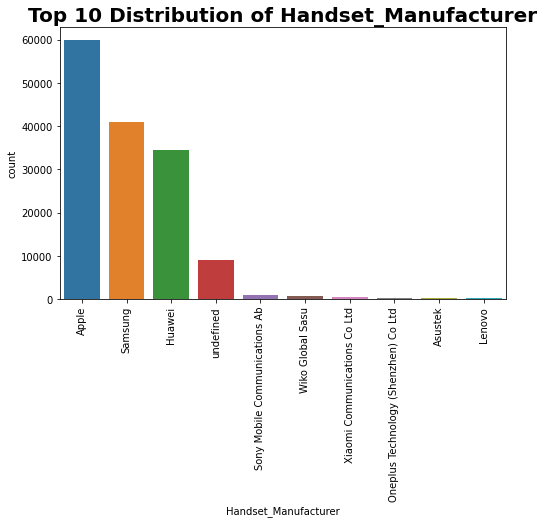

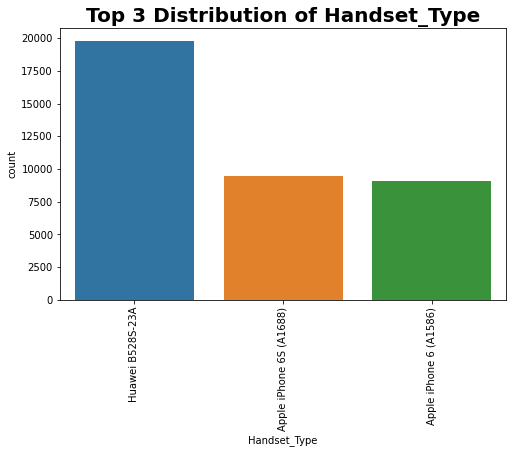

In [302]:
plot_bar(df,'Handset_Manufacturer',10)
plot_bar(df,'Handset_Type',3)


<Figure size 720x360 with 0 Axes>

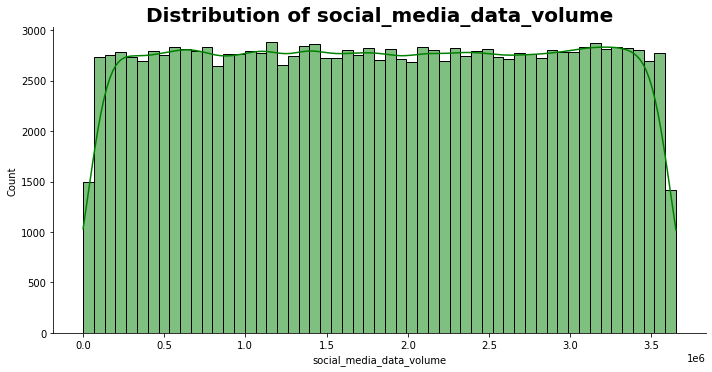

<Figure size 720x360 with 0 Axes>

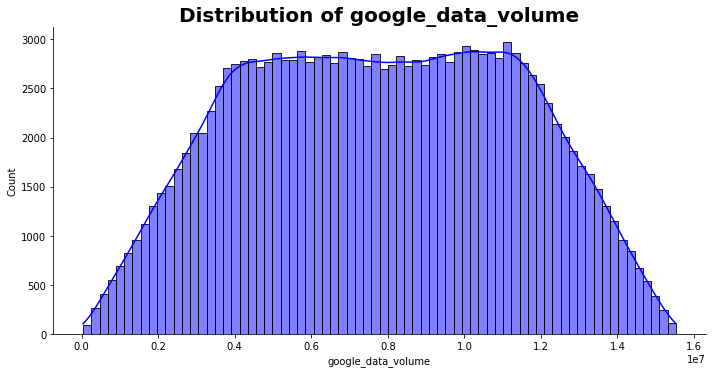

<Figure size 720x360 with 0 Axes>

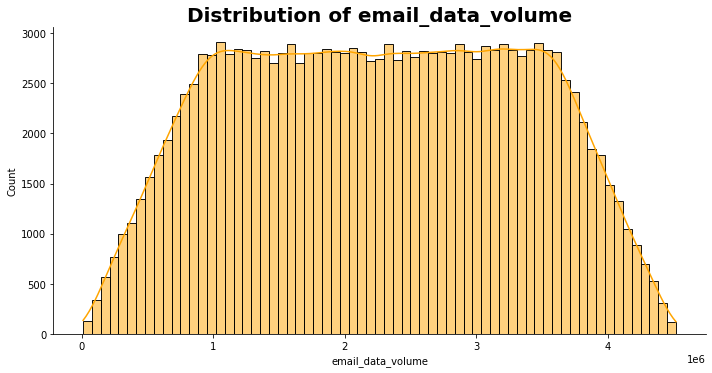

<Figure size 720x360 with 0 Axes>

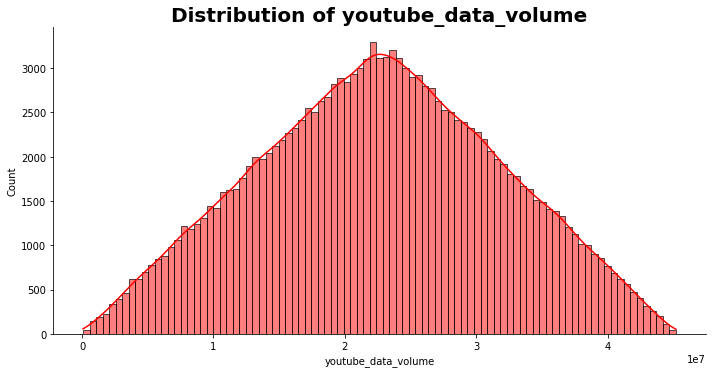

<Figure size 720x360 with 0 Axes>

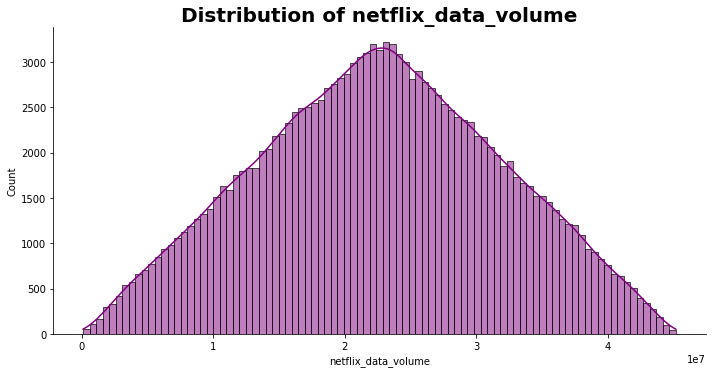

<Figure size 720x360 with 0 Axes>

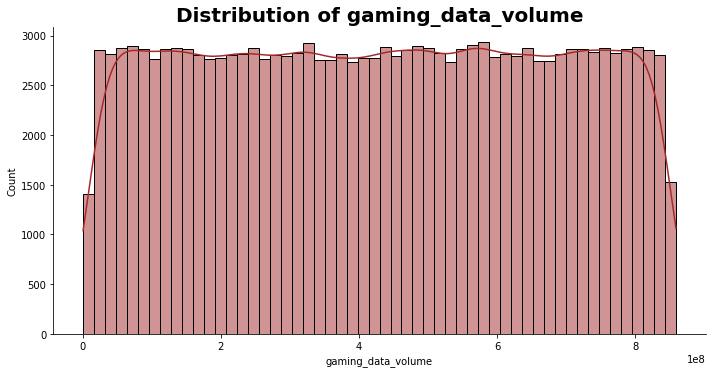

<Figure size 720x360 with 0 Axes>

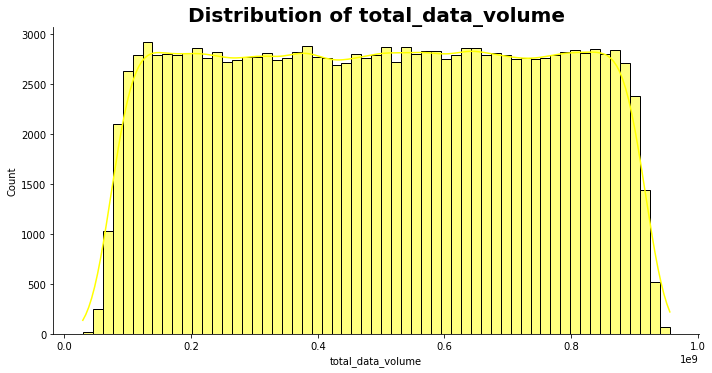

<Figure size 720x360 with 0 Axes>

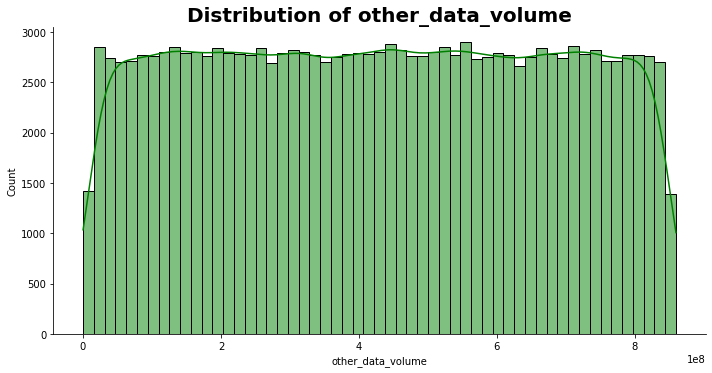

In [303]:
plot_hist(df_copy, "social_media_data_volume", "green")
plot_hist(df_copy, "google_data_volume", "blue")
plot_hist(df_copy, "email_data_volume", "orange")
plot_hist(df_copy, "youtube_data_volume", "red")
plot_hist(df_copy, "netflix_data_volume", "purple")
plot_hist(df_copy, "gaming_data_volume", "brown")
plot_hist(df_copy, "total_data_volume", "yellow")
plot_hist(df_copy, "other_data_volume", "green")

The distribution of data volume graphs show that\
Normal distribution: 
1. Youtube Data Volume: This means most users use Youtube data in the mid range, this shows there is a healthy market for Youtube data
2. Netflix Data Volume: This means most users use Netflix data in the mid range, this shows there is a healthy market for Netflix data
3. Google Data Volume:This means most users use data for google in the mid range, this shows there is a healthy market for that data
4. Email Data Volume:This means most users use data for email in the mid range, this shows there is a healthy market for that data.\

Not Normal distribution: 
5. Social Data Volume
6. Gaming Data Volume 
7. Total Data Volume 
8. Other Data Volume 

<Figure size 720x360 with 0 Axes>

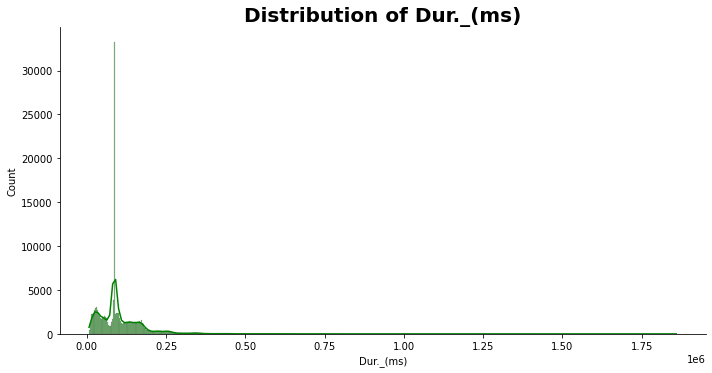

In [304]:
plot_hist(df_copy, "Dur._(ms)", "green")


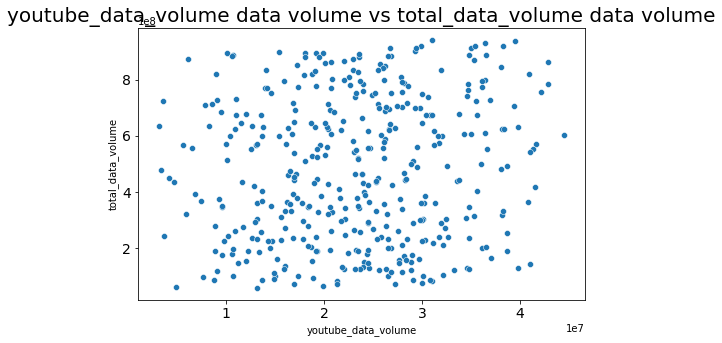

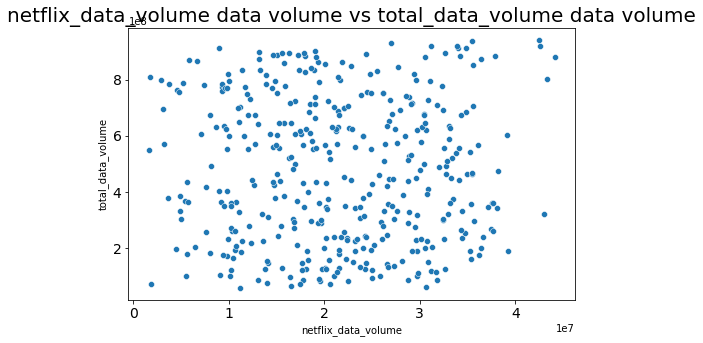

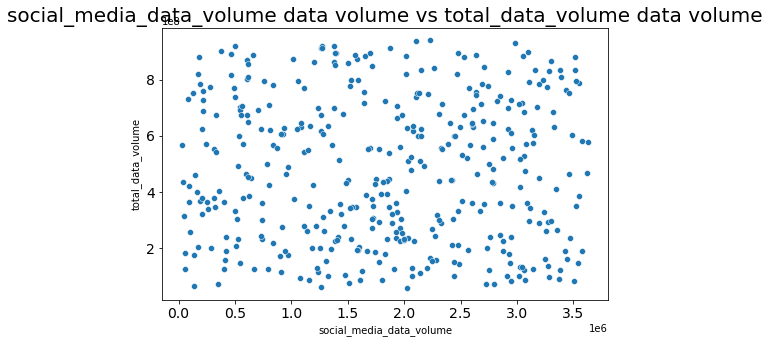

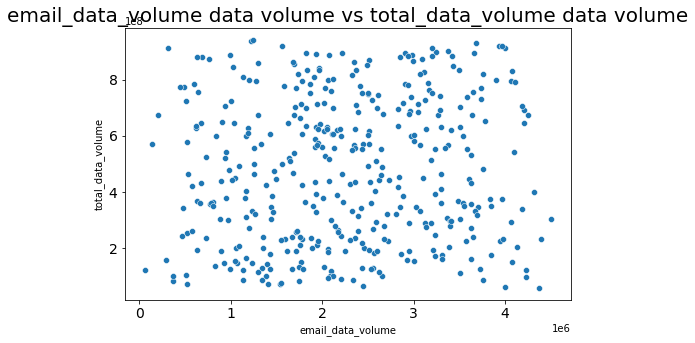

In [305]:
#plot_scatter(df_copy.head(100), x_col="youtube_data_volume", y_col="total_data_volume", hue="Handset_Type",
#             style="Handset_Type")
plot_scatter(df_copy.head(400), x_col="youtube_data_volume", y_col="total_data_volume")
plot_scatter(df_copy.head(400), x_col="netflix_data_volume", y_col="total_data_volume")
plot_scatter(df_copy.head(400), x_col="social_media_data_volume", y_col="total_data_volume")
plot_scatter(df_copy.head(400), x_col="email_data_volume", y_col="total_data_volume")

In all scatterplot, the data points are spread out. This means there is no trend in the data

Dimensionality Reduction

In [306]:
#remove strings before Dimensionality Reduction
df_model = df_copy.drop(['Start','End','Last_Location_Name','Handset_Manufacturer','Handset_Type'],axis = 1 ,inplace=False)

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Bearer_Id                  150001 non-null  float64
 1   Start_ms                   150001 non-null  float64
 2   End_ms                     150001 non-null  float64
 3   Dur._(ms)                  150001 non-null  float64
 4   IMSI                       150001 non-null  float64
 5   MSISDN/Number              150001 non-null  float64
 6   IMEI                       150001 non-null  float64
 7   Activity_Duration_DL_(ms)  150001 non-null  float64
 8   Activity_Duration_UL_(ms)  150001 non-null  float64
 9   Dur._(ms).1                150001 non-null  float64
 10  social_media_data_volume   150001 non-null  float64
 11  google_data_volume         150001 non-null  float64
 12  email_data_volume          150001 non-null  float64
 13  youtube_data_volume        15

In [307]:
# Scale data befor applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(df_model)
Scaled_data=scaling.transform(df_model)

# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)


(150001, 3)




1.   Before PCA,there were 150001 rows and 18 columns
2.   After PCA,there are 150001 rows and 3 columns 
3.   It's clear that data dimesion has been reduced



In [308]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[ 1.05675249e-01, -3.84629005e-04, -1.88668835e-03,
        -3.54267352e-01,  1.88444197e-02, -1.83462084e-02,
         3.75861283e-01,  5.50587574e-01,  5.40639960e-01,
        -3.54267053e-01,  5.54859847e-03, -3.04559093e-03,
         1.08665446e-03,  9.84925742e-04,  2.49178359e-03,
        -1.14526275e-02,  1.04575744e-02, -1.13112588e-02],
       [-8.70254292e-04,  7.00492047e-03,  7.61234543e-03,
         1.73940576e-02, -1.31735326e-02,  1.16311028e-02,
        -5.49782005e-03, -7.73146159e-04, -1.19906143e-03,
         1.73940693e-02, -4.72334102e-03, -8.66130953e-03,
        -2.10424101e-03, -2.25634587e-02, -2.27222990e-02,
        -7.05861951e-01,  3.58660785e-03, -7.06799057e-01],
       [ 8.66336885e-02,  3.04973188e-03, -1.37593419e-02,
         6.08000974e-01, -5.60039918e-02,  6.81136234e-02,
         2.08218882e-01,  3.17155018e-01,  3.16550843e-01,
         6.08001179e-01,  4.97566935e-03, -4.27246514e-03,
         1.53641953e-02,  1.18939532e-02,  2.28577355e

VIsualize subset of principle components 

In [309]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(principal.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    x,
    labels=labels,
    dimensions=range(2),
    color = df_model['MSISDN/Number'])
fig.show()

#**TASK2**





Top 10 users with high sessions frequency

In [ ]:
number_of_xDRsessions

Top 10 users with longest session duration

In [ ]:
sssiond

Top 10 users with high total data

In [ ]:
total_data

In [358]:
all_user_sessions =find_agg(df,'MSISDN/Number','count','number of xDR sessions per user',15000)
all_user_duration=df.groupby('MSISDN/Number', as_index=False).agg({"Dur._(ms).1": "sum"}).sort_values('Dur._(ms).1', ascending= False)[:15000]
all_user_total_data = group_data(df_temp,'MSISDN/Number','total_data_volume','sum',15000)

 Standardize the engagement metrics

Function to drop the 'id' of dataframe before normalizing th data

In [313]:
#drop 'id' column so that we only sclace the necessary column 
def drop_id(df):
  df_use = df.drop(columns=['MSISDN/Number'])
   
  return df_use

In [314]:
# mix-max scale the data between 0 and 1
def scaler_fix(df):
    minmax_scaler = MinMaxScaler()
    scaled_data_df = pd.DataFrame(minmax_scaler.fit_transform(df),columns=df.columns)
    return scaled_data_df

In [315]:
#add the 'id' we dropped to the scaled data
def add_id_to_scaled_data(df:pd.DataFrame):
  id_df = df[['MSISDN/Number']]
  no_id_scaled_data = scaler_fix(drop_id(df))
  id_df.reset_index(drop=True,inplace=True)
  no_id_scaled_data.reset_index(drop=True,inplace=True)
  scaled_data_with_id = pd.concat([id_df,no_id_scaled_data],axis=1)

  return scaled_data_with_id 

In [316]:
#this plots scatter plots for data that is not scaled
def create_clusters_for_not_scaled_data(df:pd.DataFrame,x_col_name:str,y_col_name:str, x:int):
  num_of_clusters = x
  kmeans = KMeans(num_of_clusters)
  kmeans.fit(df)
  identified_clusters = kmeans.fit_predict(df)
  data_with_clusters = df.copy()
  data_with_clusters['Clusters'] = identified_clusters
  plt.scatter(data_with_clusters[x_col_name],data_with_clusters[y_col_name],c=data_with_clusters['Clusters'])
  plt.title(f'{x_col_name} clusters')

In [317]:
#this plots scatter plots for scaled data,it does this my calling the function that scales the data 
def create_clusters_for_scaled_data(df:pd.DataFrame,x_col_name:str,y_col_name:str, x:int):
  #helps to scale the data
  df = add_id_to_scaled_data(df)
  num_of_clusters = x
  kmeans = KMeans(num_of_clusters)
  kmeans.fit(df)
  identified_clusters = kmeans.fit_predict(df)
  data_with_clusters = df.copy()
  data_with_clusters['Clusters'] = identified_clusters
  plt.scatter(data_with_clusters[x_col_name],data_with_clusters[y_col_name],c=data_with_clusters['Clusters'])
  plt.title(f'{x_col_name} clusters')

Scatter plots that use scaled data

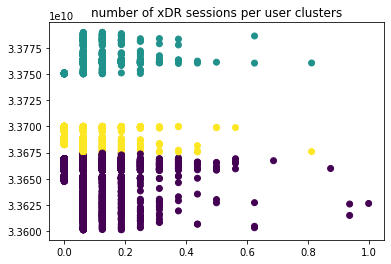

In [359]:
create_clusters_for_scaled_data(all_user_sessions,'number of xDR sessions per user','MSISDN/Number',3)

>>>> The scatter plot shows 3 clusters of users. These clusters have been created depeding on the numbers of Sessions per user. This scatter plot uses scaled data.

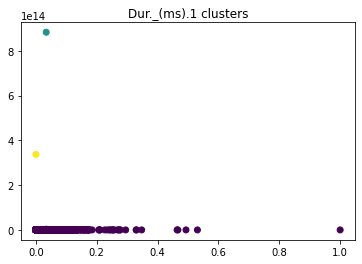

In [360]:
create_clusters_for_scaled_data(all_user_duration,'Dur._(ms).1','MSISDN/Number',3)

>>>> The scatter plot shows 3 clusters of users. These clusters have been created depeding on the Durations of sessions for each user. This scatter plot uses scaled data.

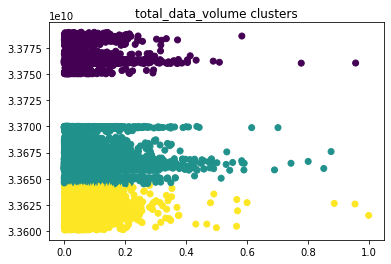

In [361]:
create_clusters_for_scaled_data(all_user_total_data,'total_data_volume','MSISDN/Number',3)

>>>> The scatter plot shows 3 clusters of users. These clusters have been created depeding on the Total data volume of each user. This scatter plot uses scaled data.

Scatter plots that are using data that is not scaled

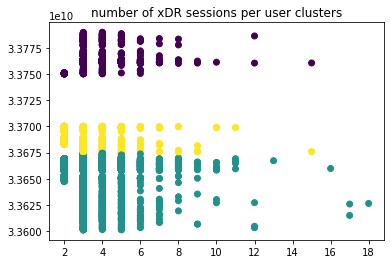

In [362]:
create_clusters_for_not_scaled_data(all_user_sessions,'number of xDR sessions per user','MSISDN/Number',3)

>>>> The scatter plot shows 3 clusters of users. These clusters have been created depeding on the numbers of Sessions per user. This scatter plot uses data that is not scaled.

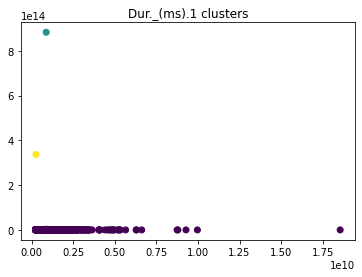

In [363]:
create_clusters_for_not_scaled_data(all_user_duration,'Dur._(ms).1','MSISDN/Number',3)

>>>> The scatter plot shows 3 clusters of users. These clusters have been created depeding on the duration of sessions for each user. This scatter plot uses data that is not scaled.

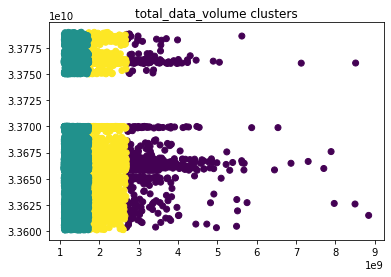

In [364]:
create_clusters_for_not_scaled_data(all_user_total_data,'total_data_volume','MSISDN/Number',3)

>>>> The scatter plot shows 3 clusters of users. These clusters have been created depeding on the total data volume for each user. This scatter plot uses data that is not scaled.

Calculating the min,max,mean of each metric

In [324]:
drop_id(number_of_xDRsessions).describe().transpose()

count  mean       std  ...   50%    75%   max
number of xDR sessions per user   10.0  14.7  2.311805  ...  15.0  16.75  18.0

[1 rows x 8 columns]

In [325]:
drop_id(sssiond).describe().transpose()

count          mean  ...           75%           max
Dur._(ms).1   10.0  8.549931e+09  ...  9.157566e+09  1.855376e+10

[1 rows x 8 columns]

In [326]:
drop_id(total_data).describe().transpose()

count          mean  ...           75%           max
total_data_volume   10.0  7.728255e+09  ...  8.367507e+09  8.846226e+09

[1 rows x 8 columns]

Deriving top 10  most engaged social media users.The tables show the data in 'bytes'.

In [327]:
social_data = group_data(df_temp,'MSISDN/Number','social_media_data_volume','sum',10)
social_data

MSISDN/Number  social_media_data_volume
13526    3.362632e+10                43374779.0
92923    3.376054e+10                39783189.0
37052    3.365973e+10                35412358.0
6437     3.361489e+10                28294544.0
13180    3.362578e+10                27135500.0
65118    3.366716e+10                24247850.0
106137   3.378632e+10                23974919.0
70960    3.366907e+10                23800834.0
666      3.360313e+10                23077825.0
31331    3.365849e+10                23000066.0

Deriving top 10  most engaged google users.The tables show the data in 'bytes'.

In [328]:
google_data = group_data(df_temp,'MSISDN/Number','google_data_volume','sum',10)
google_data

MSISDN/Number  google_data_volume
13526    3.362632e+10         152191852.0
13180    3.362578e+10         142307915.0
6437     3.361489e+10         127973787.0
92923    3.376054e+10         123223099.0
37052    3.365973e+10         116516345.0
106137   3.378632e+10         110254484.0
76363    3.367588e+10         109860502.0
65118    3.366716e+10         105032696.0
94654    3.376127e+10          97089988.0
86313    3.369876e+10          91935151.0

Deriving top 10  most engaged email users.The tables show the data in 'bytes'.

In [329]:
email_data = group_data(df_temp,'MSISDN/Number','email_data_volume','sum',10)
email_data

MSISDN/Number  email_data_volume
13526    3.362632e+10         42418782.0
6437     3.361489e+10         40788634.0
13180    3.362578e+10         40633966.0
106137   3.378632e+10         36310123.0
37052    3.365973e+10         35999792.0
92923    3.376054e+10         33693767.0
76363    3.367588e+10         31514421.0
60087    3.366546e+10         30417885.0
65118    3.366716e+10         30335796.0
86455    3.369879e+10         29059042.0

Deriving top 10  most engaged youtube users.The tables show the data in 'bytes'.

In [330]:
youtube_data = group_data(df_temp,'MSISDN/Number','youtube_data_volume','sum',10)
youtube_data

MSISDN/Number  youtube_data_volume
13180   3.362578e+10          452958769.0
92923   3.376054e+10          396289198.0
6437    3.361489e+10          394370218.0
13526   3.362632e+10          374483047.0
76363   3.367588e+10          317410572.0
65118   3.366716e+10          315231310.0
13994   3.362708e+10          308790774.0
92577   3.376041e+10          303169107.0
86455   3.369879e+10          302661958.0
666     3.360313e+10          284090139.0

Deriving top 10  most engaged netflix users.The tables show the data in 'bytes'.

In [331]:
netflix_data = group_data(df_temp,'MSISDN/Number','netflix_data_volume','sum',10)
netflix_data

MSISDN/Number  netflix_data_volume
37052    3.365973e+10          399519079.0
6437     3.361489e+10          361401046.0
13180    3.362578e+10          356980607.0
92923    3.376054e+10          334643269.0
13526    3.362632e+10          328725740.0
92577    3.376041e+10          318347546.0
65118    3.366716e+10          313939488.0
76363    3.367588e+10          309093159.0
106137   3.378632e+10          305939790.0
94654    3.376127e+10          292091341.0

Deriving top 10  most engaged gaming users.The tables show the data in 'bytes'.

In [332]:
gaming_data = group_data(df_temp,'MSISDN/Number','gaming_data_volume','sum',10)
gaming_data

MSISDN/Number  gaming_data_volume
6437    3.361489e+10        7.749432e+09
92923   3.376054e+10        7.461045e+09
13180   3.362578e+10        7.326673e+09
76363   3.367588e+10        6.970568e+09
13526   3.362632e+10        6.887572e+09
37052   3.365973e+10        6.725559e+09
63028   3.366646e+10        6.646303e+09
92577   3.376041e+10        6.268620e+09
57241   3.366471e+10        6.103856e+09
86455   3.369879e+10        5.753743e+09

In [333]:
df_need = df_temp.filter(['gaming_data_volume','social_data_volume','email_data_volume','netflix_data_volume',\
                  'youtube_data_volume','google_data_volume'],axis=1)
df_need.sum(axis =0 ,skipna=True)

gaming_data_volume     6.455040e+13
email_data_volume      3.388676e+11
netflix_data_volume    3.394314e+12
youtube_data_volume    3.396545e+12
google_data_volume     1.171102e+12
dtype: float64

In [334]:
s = df_need.sum(axis=0,skipna=True)
s.to_frame(name='Bytes')

Bytes
gaming_data_volume   6.455040e+13
email_data_volume    3.388676e+11
netflix_data_volume  3.394314e+12
youtube_data_volume  3.396545e+12
google_data_volume   1.171102e+12

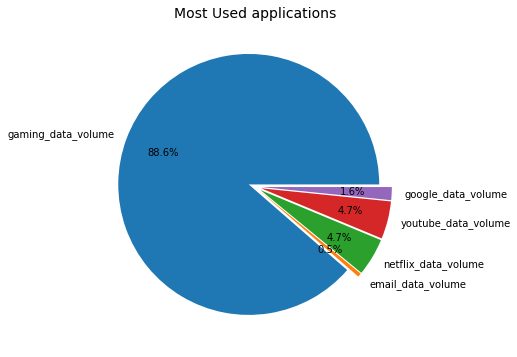

In [335]:
#s.plot.pie(autopct="%.1f%%");
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = s.keys()
plt.pie(x=s, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.7)
plt.title("Most Used applications", fontsize=14);
pie.savefig("most_used_app.png")

>>>>> The pie chart shows that the most used application is gaming, followed by Netflix and Youtube. This can help  the comapny to know where to focus most of their networ resources.

Find optimal value of k

In [336]:
def find_optimal_k_value(df:pd.DataFrame):
  X = df
  distortions = []
  inertias = []
  K = range(1, 10)

  for k in K:
    # Building and fitting the model
	  kmeanModel = KMeans(n_clusters=k).fit(X)
	  kmeanModel.fit(X)

	  distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	  inertias.append(kmeanModel.inertia_)
 
  plt.plot(K, inertias, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()


Optimal value of k on Session Frequecy

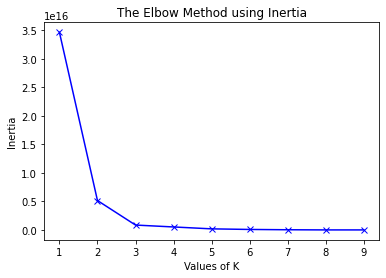

In [337]:
find_optimal_k_value(number_of_xDRsessions)

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.

Optimal value of k on Session Duration

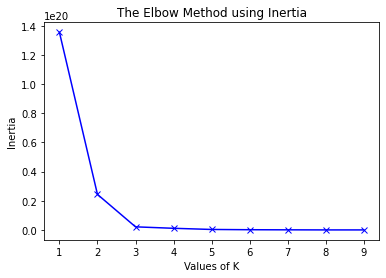

In [338]:
find_optimal_k_value(sssiond)

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

Optimal value of k on Total Data

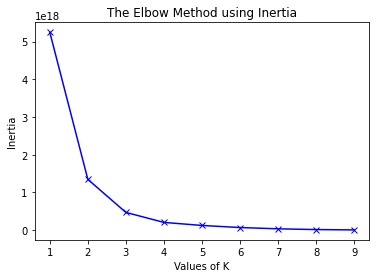

In [339]:
find_optimal_k_value(total_data)

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

#**TASK3**

In [340]:
#check column names in dataframe
df_task3.columns.tolist()

['MSISDN/Number',
 'Handset_Type',
 'Avg_Bearer_TP_DL_(kbps)',
 'Avg_Bearer_TP_UL_(kbps)',
 'Avg_RTT_DL_(ms)',
 'Avg_RTT_UL_(ms)',
 'TCP_DL_Retrans._Vol_(Bytes)',
 'TCP_UL_Retrans._Vol_(Bytes)']

In [341]:
#check null values in each column
df_task3.isna().sum()

MSISDN/Number                   1066
Handset_Type                     572
Avg_Bearer_TP_DL_(kbps)            1
Avg_Bearer_TP_UL_(kbps)            1
Avg_RTT_DL_(ms)                27829
Avg_RTT_UL_(ms)                27812
TCP_DL_Retrans._Vol_(Bytes)    88146
TCP_UL_Retrans._Vol_(Bytes)    96649
dtype: int64

In [342]:
#fix all missing values using ffill
df_task3['MSISDN/Number'] = fix_missing_ffill(df_task3, 'MSISDN/Number')
df_task3['Handset_Type'] = fix_missing_ffill(df_task3, 'Handset_Type')
df_task3['Avg_Bearer_TP_DL_(kbps)'] = fix_missing_ffill(df_task3, 'Avg_Bearer_TP_DL_(kbps)')
df_task3['Avg_Bearer_TP_UL_(kbps)'] = fix_missing_ffill(df_task3, 'Avg_Bearer_TP_UL_(kbps)')
df_task3['Avg_RTT_DL_(ms)'] = fix_missing_ffill(df_task3, 'Avg_RTT_DL_(ms)')
df_task3['Avg_RTT_UL_(ms)'] = fix_missing_ffill(df_task3, 'Avg_RTT_UL_(ms)')
df_task3['TCP_DL_Retrans._Vol_(Bytes)'] = fix_missing_bfill(df_task3, 'TCP_DL_Retrans._Vol_(Bytes)')
df_task3['TCP_UL_Retrans._Vol_(Bytes)'] = fix_missing_bfill(df_task3, 'TCP_UL_Retrans._Vol_(Bytes)')


Drop rows that still have null values

In [343]:
df_task3 = df_task3.dropna()

Verify if all missing values have been filled

In [344]:
df_task3.isna().sum()

MSISDN/Number                  0
Handset_Type                   0
Avg_Bearer_TP_DL_(kbps)        0
Avg_Bearer_TP_UL_(kbps)        0
Avg_RTT_DL_(ms)                0
Avg_RTT_UL_(ms)                0
TCP_DL_Retrans._Vol_(Bytes)    0
TCP_UL_Retrans._Vol_(Bytes)    0
dtype: int64

In [345]:
df_task3['Throughput_Total'] = df_task3["Avg_Bearer_TP_UL_(kbps)"] + df_task3["Avg_Bearer_TP_DL_(kbps)"]
df_task3['Avg_Throughput'] = df_task3['Throughput_Total']/2
df_task3['RTT_Total'] =df_task3["Avg_RTT_UL_(ms)"] + df_task3["Avg_RTT_DL_(ms)"]
df_task3['Avg_RTT'] = df_task3['RTT_Total']/2
df_task3['TCP_Total'] = df_task3["TCP_UL_Retrans._Vol_(Bytes)"] + df_task3["TCP_DL_Retrans._Vol_(Bytes)"]
df_task3['Avg_TCP'] = df_task3['TCP_Total']/2
df_task3.head(2)


MSISDN/Number                 Handset_Type  ...  TCP_Total  Avg_TCP
0   3.366496e+10   Samsung Galaxy A5 Sm-A520F  ...    26750.0  13375.0
1   3.368185e+10  Samsung Galaxy J5 (Sm-J530)  ...    26750.0  13375.0

[2 rows x 14 columns]

In [346]:
#Show most common value in TCP total
df_task3.TCP_Total.mode()

0    115067.0
dtype: float64

In [347]:
#Show most common value in RTT total
df_task3.RTT_Total.mode()

0    29.0
dtype: float64

In [348]:
##Show most common value in Throughput total
df_task3.Throughput_Total.mode()

0    63.0
dtype: float64

In [349]:
#Show top 10 highest values in TCP total
df_task3_tcp = df_task3[['MSISDN/Number','TCP_Total']]
df_task3_tcp.nlargest(10,'TCP_Total')

MSISDN/Number     TCP_Total
34633    3.366707e+10  4.344116e+09
34634    3.365952e+10  4.344116e+09
34635    3.369910e+10  4.344116e+09
34636    3.366045e+10  4.344116e+09
140797   3.369858e+10  4.301477e+09
77950    3.376211e+10  4.294432e+09
135677   3.365872e+10  4.291465e+09
3741     3.365871e+10  4.288121e+09
119666   3.376932e+10  4.275492e+09
119667   3.366469e+10  4.275492e+09

In [350]:
#Show top 10 highest values in RTT total
df_task3_rtt = df_task3[['MSISDN/Number','RTT_Total']]
df_task3_rtt.nlargest(10,'RTT_Total')

MSISDN/Number  RTT_Total
30155    3.366232e+10    96924.0
29916    3.366087e+10    64641.0
17894    3.366107e+10    55812.0
5963     3.368369e+10    54848.0
22839    3.376094e+10    27278.0
23442    3.360679e+10    26300.0
1361     3.369855e+10    25922.0
81256    3.367182e+10    25715.0
97312    3.378187e+10    25388.0
100575   3.378401e+10    24738.0

In [351]:
##Show top 10 highest values in Throughput total
df_task3_throughput = df_task3[['MSISDN/Number','Throughput_Total']]
df_task3_throughput.nlargest(10,'Throughput_Total')

MSISDN/Number  Throughput_Total
120876   3.366117e+10          382262.0
143670   3.367251e+10          313244.0
141250   3.369817e+10          304299.0
91298    3.366662e+10          300546.0
116794   3.365991e+10          283931.0
141449   3.366566e+10          281144.0
149616   3.365169e+10          277152.0
92177    3.366856e+10          276205.0
116550   3.366549e+10          274052.0
117776   3.376869e+10          269888.0

In [352]:
#Show the bottom 10 values in TCP Total
df_task3_tcp = df_task3[['MSISDN/Number','TCP_Total']]
df_task3_tcp.nsmallest(10,'TCP_Total')

MSISDN/Number  TCP_Total
92877    3.366610e+10       41.0
59589    3.376157e+10       44.0
93551    3.366255e+10       51.0
2702     3.376142e+10       81.0
80347    3.366677e+10       82.0
143594   3.365879e+10       86.0
8799     3.369926e+10       88.0
11904    3.376000e+10       88.0
11905    3.366179e+10       88.0
59590    3.366939e+10       92.0

In [353]:
#Show the bottom 10 values in Throughput Total
df_task3_throughput = df_task3[['MSISDN/Number','Throughput_Total']]
df_task3_throughput.nsmallest(10,'Throughput_Total')

MSISDN/Number  Throughput_Total
148    3.365033e+10               0.0
614    3.365821e+10               0.0
2460   3.376131e+10               0.0
3893   3.364092e+10               0.0
4129   3.366621e+10               0.0
4822   3.366747e+10               0.0
5796   3.369885e+10               0.0
5961   3.376954e+10               0.0
6135   3.375131e+10               0.0
7186   3.378292e+10               0.0

In [354]:
#Show the bottom 10 values in RTT Total
df_task3_rtt = df_task3[['MSISDN/Number','RTT_Total']]
df_task3_rtt.nsmallest(10,'RTT_Total')

MSISDN/Number  RTT_Total
42602    3.365298e+10        0.0
103321   3.360926e+10        0.0
103322   3.367095e+10        0.0
103323   3.366276e+10        0.0
103324   3.366451e+10        0.0
124538   3.366158e+10        0.0
124539   3.361438e+10        0.0
143878   3.364275e+10        0.0
143879   3.363717e+10        0.0
71738    3.366020e+10        2.0

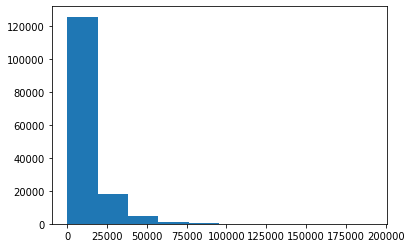

In [355]:
plt.hist(data = df_task3, x = 'Avg_Throughput');
plt.show()

>>>>This shows that almost 25% of users are the ones with the highest Avarage  Throughput

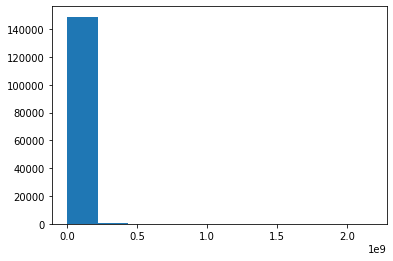

In [356]:
plt.hist(data = df_task3, x = 'Avg_TCP');
plt.show()

>>>> This shows that there are two groups.The first group has the highest number of Average TCP while the seconf group has a very small number of Average TCP.

#**Task 4**

In [90]:
#this plots scatter plots for data that is not scaled
#def create_clusters_for_not_scaled_data(df:pd.DataFrame,x_col_name:str,y_col_name:str, x:int):
#create_clusters_for_not_scaled_data(number_of_xDRsessions,'number of xDR sessions per user','MSISDN/Number',3)
x_col_name = 'number of xDR sessions per user'
y_col_name = 'MSISDN/Number'
df = number_of_xDRsessions
num_of_clusters = 3
kmeans = KMeans(num_of_clusters)
kmeans.fit(df)
df.shape
#identified_clusters = kmeans.fit_predict(df)
#centroids = kmeans.cluster_centers_
#data_with_clusters = df.copy()
#data_with_clusters['Clusters'] = identified_clusters
#plt.scatter(data_with_clusters[x_col_name],data_with_clusters[y_col_name],c=data_with_clusters['Clusters'])
#plt.title(f'{x_col_name} clusters')

(10, 2)

In [ ]:
x_dist = kmeans.transform(df)
dfg = pd.DataFrame(x_dist.sum(axis=1).round(2),columns=['sqdist'])
dfg
centroid = centroids[2]
dfg['eng_score'] = dfg.apply(lambda x: np.linalg.norm(centroids),1)

(10, 2)

#**Recomendations**



1.   The most used application is gaming.Gaming data makes up most of the data on the network.I would recomend to the company to focus some of their network resources to gaming so that they cam maximize on the opportunity.
2.   The next common used applications are Youtube and Netflix.THe company can also focus some of it's resources here to help improve the revenue of the company.
3.   The most common used handsets on the network belong to Apple. The company can also reach out to Apple so that Apple devices can exclusively use it's network.This in turn can improve the revenue of the company.

